# DataFrame에서 날짜/시간(datetime) 타입 데이터 다루기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SPX 데이터셋

In [ ]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/examples/spx.csv'

In [ ]:
spx = pd.read_csv(file_path)

In [ ]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [ ]:
spx.tail()

,Date,SPX
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66
5471,2011-10-14 00:00:00,1224.58


In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


## 문자열 타입의 컬럼을 날짜/시간(datetime) 타입으로 변환

In [ ]:
spx['Date'] = pd.to_datetime(spx['Date'])  # pd.to_datetime(spx['Date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [ ]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## CSV 파일에서 DataFrame을 생성할 때 날짜/시간 컬럼을 지정

In [ ]:
# spx = pd.read_csv(file_path, parse_dates=['Date'])
# spx = pd.read_csv(file_path, parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
spx = pd.read_csv(file_path, parse_dates=['Date'],
                  date_format={'Date': '%Y-%m-%d %H:%M:%S'})

In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [ ]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## 기간별(연도별/분기별/월별) 통계

In [ ]:
# Date 컬럼 -> Index(row label)로 변환
spx_with_index = spx.set_index('Date')

In [ ]:
spx_with_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


In [ ]:
spx_with_index.head()  #> DatetimeIndex를 갖는 DataFrame

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [ ]:
# 연도별 SPX의 평균
by_year = spx_with_index.resample('Y').mean()

In [ ]:
by_year.head()

,SPX
Date,
1990-12-31,334.123506
1991-12-31,376.186324
1992-12-31,415.747008
1993-12-31,451.614822
1994-12-31,460.416508


In [ ]:
by_year.tail()

,SPX
Date,
2007-12-31,1477.184343
2008-12-31,1220.042055
2009-12-31,948.046389
2010-12-31,1139.965516
2011-12-31,1276.093015


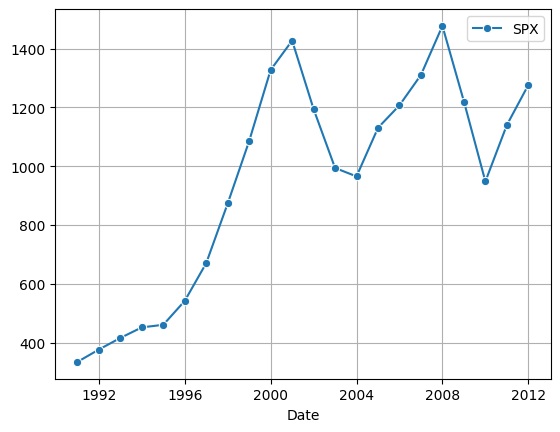

In [ ]:
sns.lineplot(data=by_year, marker='o')
plt.grid()
plt.show()

In [ ]:
# 분기별 SPX의 평균
by_quarter = spx_with_index.resample('Q').mean()

In [ ]:
by_quarter.head()

,SPX
Date,
1990-03-31,334.751951
1990-06-30,349.796508
1990-09-30,335.881746
1990-12-31,316.562031
1991-03-31,352.282951


In [ ]:
by_quarter.tail()

,SPX
Date,
2010-12-31,1204.585625
2011-03-31,1302.529032
2011-06-30,1318.332857
2011-09-30,1225.268438
2011-12-31,1171.356000


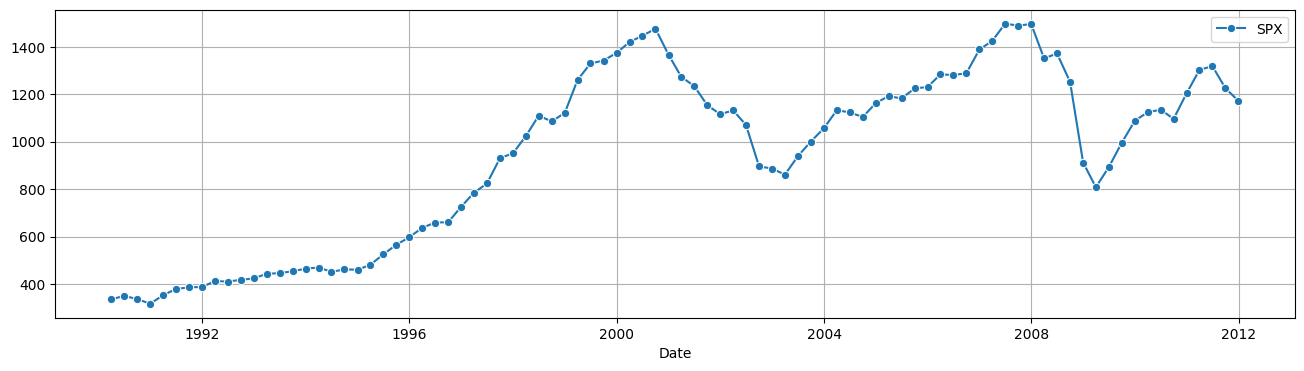

In [ ]:
fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=by_quarter, marker='o')
plt.grid()
plt.show()

In [ ]:
# 월별 SPX 평균
by_month = spx_with_index.resample('M').mean()

In [ ]:
by_month.head()

,SPX
Date,
1990-02-28,330.452632
1990-03-31,338.465000
1990-04-30,338.178000
1990-05-31,350.250000
1990-06-30,360.386667


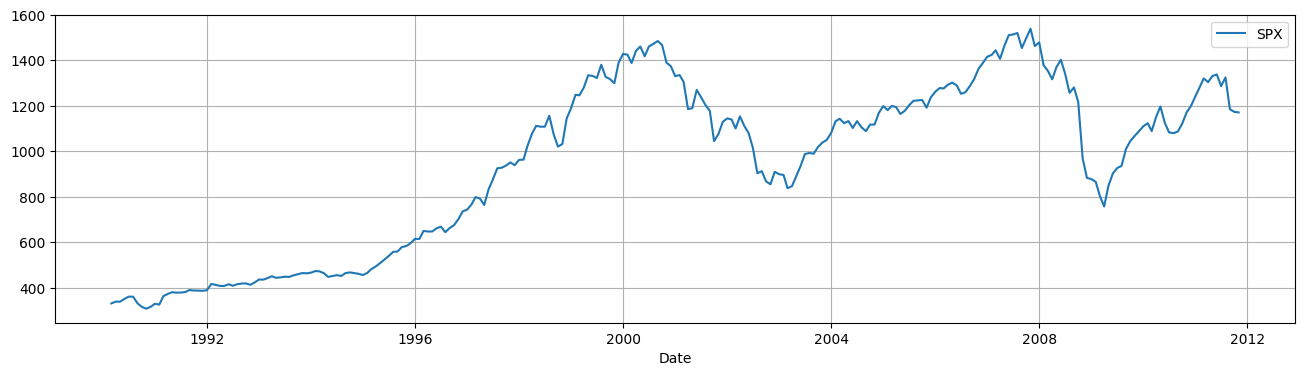

In [ ]:
fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=by_month)
plt.grid()
plt.show()

In [ ]:
# pd.read_csv() 함수 index_col 파라미터: 컬럼을 인덱스로 설정
spx = pd.read_csv(file_path, parse_dates=['Date'], index_col=['Date'])

In [ ]:
spx.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


# banklist 데이터셋

*   [banklist.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/banklist.csv)
*   데이터프레임을 생성할 때 날짜/시간(datetime) 타입으로 변환할 수 있는 모든 컬럼들은 날짜/시간 타입으로 변환
*   연도별 파산한 은행 숫자 시각화
*   분기별 파산한 은행 숫자 시각화
*   월별 파산한 은행 숫자 시각화
*   기간별 통계는 Closing Date를 기준으로.

In [ ]:
banklist_file = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/banklist.csv'

In [ ]:
banklist = pd.read_csv(banklist_file,
                       parse_dates=['Closing Date', 'Updated Date'],
                       index_col=['Closing Date'])

In [ ]:
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [ ]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2017-12-15 to 2000-10-13
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 30.4+ KB


In [ ]:
banklist['Updated Date'].describe()

,Updated Date
count,555
mean,2014-06-07 23:41:50.270270208
min,2002-11-18 00:00:00
25%,2012-08-23 00:00:00
50%,2014-03-21 00:00:00
75%,2016-07-11 12:00:00
max,2018-02-12 00:00:00


## 기간별 resampling

In [ ]:
def lineplot_resampled(rule):
    df = banklist.resample(rule).size()
    fig = plt.figure(figsize=(20, 4))
    sns.lineplot(data=df, marker='o')
    plt.grid()
    plt.show()

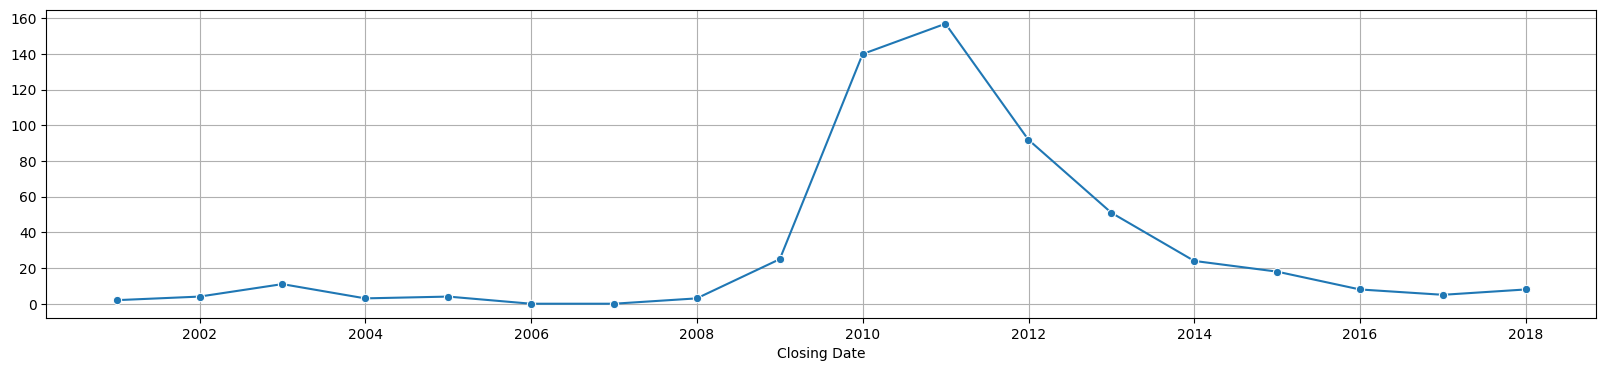

In [ ]:
lineplot_resampled('Y')

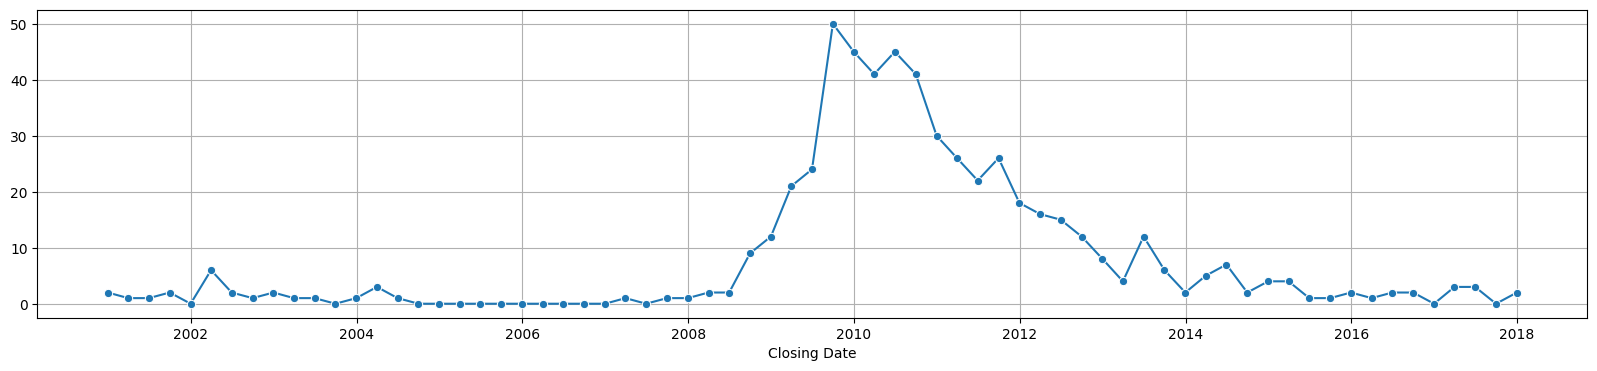

In [ ]:
lineplot_resampled('Q')

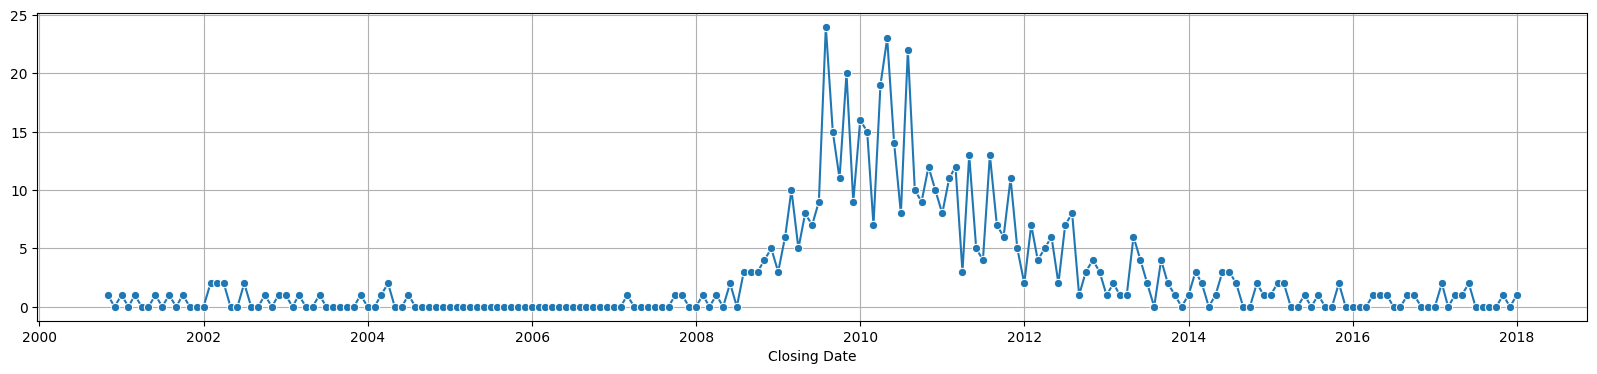

In [ ]:
lineplot_resampled('M')